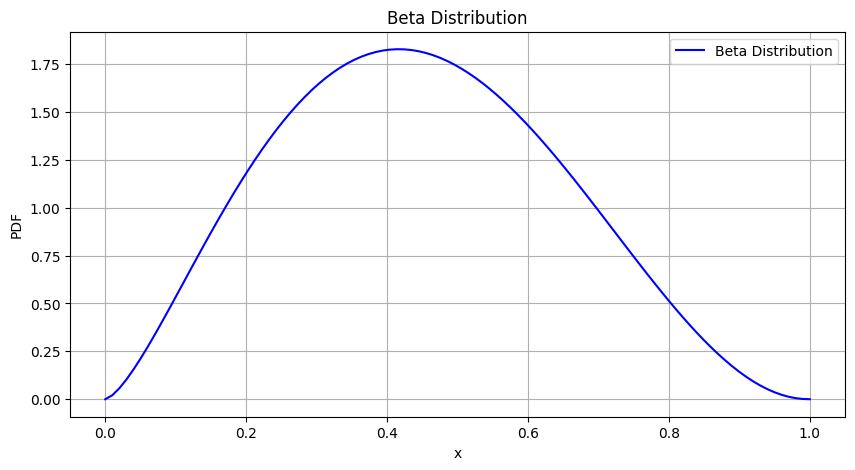

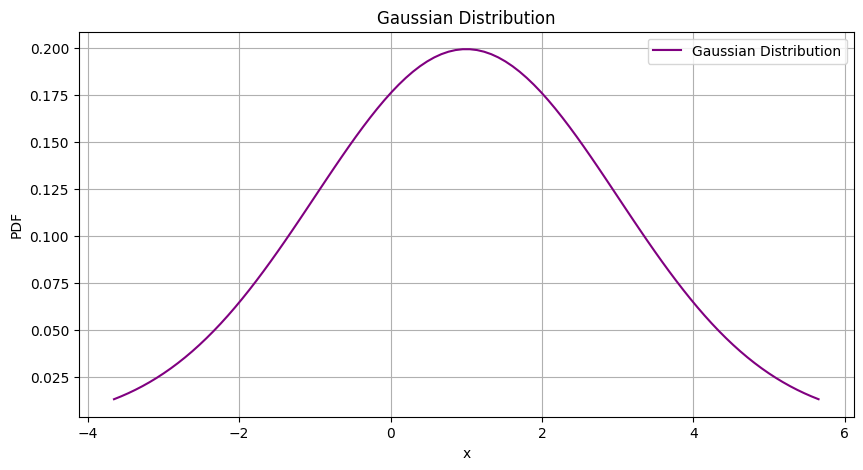

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import beta, norm , multinomial

# Beta Distribution

a, b = 2.5, 3.1
x_0 = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)

plt.figure(figsize=(10, 5))  # Create a new figure for Beta
plt.plot(x_0, beta.pdf(x_0, a, b), label='Beta Distribution', color='blue')
plt.title('Beta Distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()  

# Gaussian Distribution

mu, sigma = 1, 2
x_1 = np.linspace(norm.ppf(0.01, loc=mu, scale=sigma), norm.ppf(0.99, loc=mu, scale=sigma), 100)

plt.figure(figsize=(10, 5)) 
plt.plot(x_1, norm.pdf(x_1, loc=mu, scale=sigma), label='Gaussian Distribution', color='purple')
plt.title('Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()  

# Multinomial Distribution

p = np.ones(6) / 6
probability = multinomial.pmf([6,0,0,0,0,0] , n = 6 , p = p)
ran_num = multinomial.rvs(n = 100 , p = p ,size = 5) #you're simulating rolling a fair 6-sided die 100 times, and repeating this simulation 5 times to get 5 different sets of results. Each result shows how many times each number (1 to 6) appears in 100 rolls.


# Random Numbers from your own distribution

class mr_p_solver_dist(st.rv_continuous):
    def _pdf(self,x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))*(b1*np.exp(-np.sqrt(x/a1)) + b2*np.exp(-np.sqrt(x/a2)))
    def _cdf(self, x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))* ( -2*a1*b1*(np.sqrt(x/a1)+1)*np.exp(-np.sqrt(x/a1)) \
           -2*a2*b2*(np.sqrt(x/b2)+1)*np.exp(-np.sqrt(x/b2)) \
           + 2*a1*b1 + 2*a2*b2 )
    def _rvs(self, a1, a2, b1, b2, delta=0.001, size=None, random_state=None):
        a_min = min([a1, a2])
        x = np.linspace(0, a_min*np.log(1/delta)**2, 10000)
        r = np.random.rand(size)
        return x[np.searchsorted(self._cdf(x[:-1], a1, a2, b1, b2), r)]

my_rv = mr_p_solver_dist(a=0, b=np.inf)
